Decision Trees and Random Forest

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('loandata.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
installment: The monthly installments owed by the borrower if the loan is funded.
log.annual.inc: The natural log of the self-reported annual income of the borrower.
dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
fico: The FICO credit score of the borrower.
days.with.cr.line: The number of days the borrower has had a credit line.
revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

EDA

In [3]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

More than a thousand of the borrowers have not completed the loan repayment.

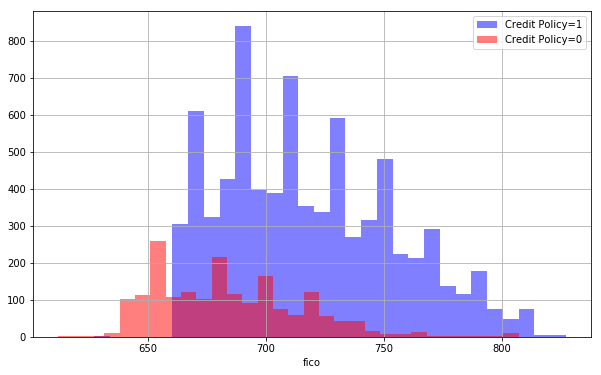

In [7]:
fig = plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins = 30,color = 'blue', label='Credit Policy=1',alpha=0.5)
df[df['credit.policy']==0]['fico'].hist(bins = 30, color = 'red', label='Credit Policy=0',alpha=0.5)
plt.xlabel('fico')
plt.legend()

A sizable number of people met the credit policy. It can be inferred that people with low FICO score do not meet the credit policy.

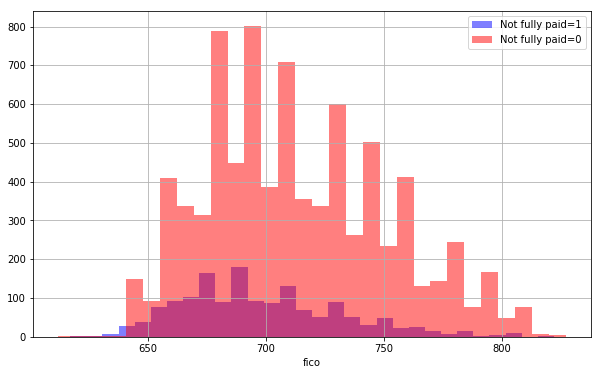

In [8]:
fig = plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins = 30,color = 'blue', label='Not fully paid=1',alpha=0.5)
df[df['not.fully.paid']==0]['fico'].hist(bins = 30, color = 'red', label='Not fully paid=0',alpha=0.5)
plt.xlabel('fico')
plt.legend()

Majority of the borrowers are yet to complete the loan repayment

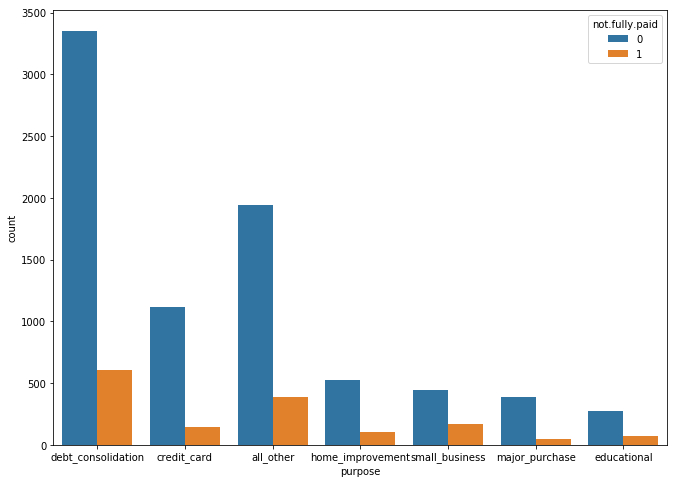

In [9]:
fig = plt.figure(figsize=(11,8))
sns.countplot(x='purpose',data=df, hue='not.fully.paid')

From the chat above, debt consolidation seems to be the most popular reason for wanting a loan while the least popular is educational.

/Users/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


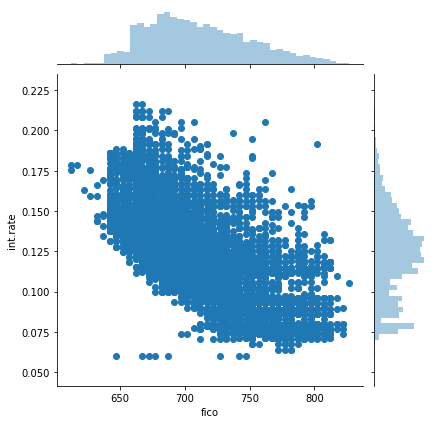

In [10]:
sns.jointplot(x='fico',y='int.rate',data=df)

As FICO score increases, the interest rate increases and vice versa

/Users/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x432 with 0 Axes>

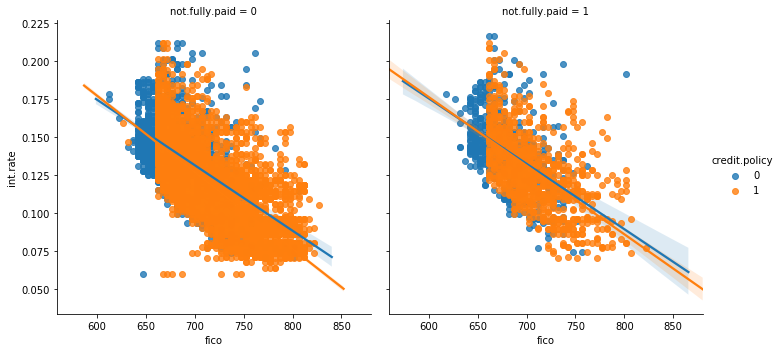

In [11]:
plt.figure(figsize=(10,6))
sns.lmplot(x='fico',y='int.rate',data=df, hue='credit.policy', col='not.fully.paid')

The behaviour of customers is relatively the same,whether they were denied the loan or not.

Converting the categorical datapoints to numerical

In [12]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [15]:
cat_feats = ['purpose']

In [16]:
df_final = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [17]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X = df_final.drop('not.fully.paid', axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
predictions = dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(confusion_matrix(y_test,predictions))

[[1996  435]
 [ 347   96]]


In [30]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.18      0.22      0.20       443

avg / total       0.75      0.73      0.74      2874



Training the Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
forest = RandomForestClassifier(n_estimators=400)

In [34]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
predictions = forest.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.58      0.02      0.05       443

avg / total       0.81      0.85      0.78      2874



In [38]:
print(confusion_matrix(y_test,predictions))

[[2423    8]
 [ 432   11]]
